# Articles Multiclass Classifier

In [1]:
import numpy as np 
import pandas as pd 
import nltk
import string as s
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB 
%matplotlib inline
import seaborn as sns
import re
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!pip install scipi

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
import scipi as sc

#### There are 4 classes of news articles: 
1. World News
2. Sports News
3. Business News
4. Sci-Tech News

In [6]:
train_data=pd.read_csv("/home/vineet/workspace/paridhi/nlp/train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("/home/vineet/workspace/paridhi/nlp/test.csv",header=0,names=['classid','title','desc'])

## Analysing the data 

In [7]:
train_data.head()


,classid,title,desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [8]:
test_data.head()


,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [9]:
train_data.shape


(120000, 3)

In [10]:
test_data.shape


(7600, 3)

In [11]:
train_data.classid.values

array([3, 3, 3, ..., 2, 2, 2])

#### Exploring plots: count plot of Train Data

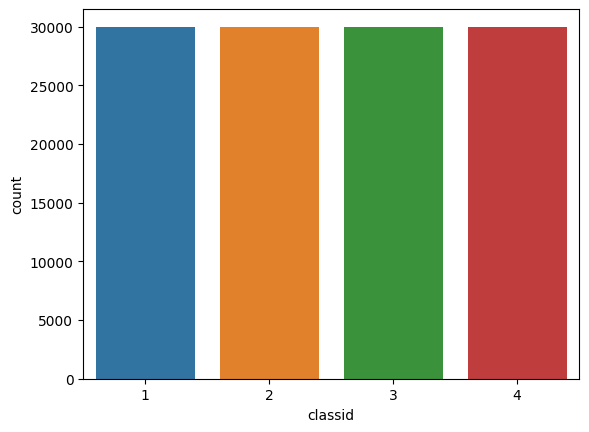

In [12]:
sns.countplot(train_data, x='classid');

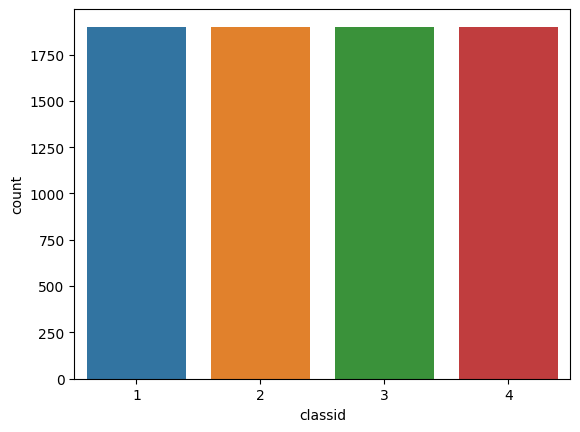

In [13]:
sns.countplot(test_data, x = test_data.classid);


#### Splitting Data into Input and Label¶


In [14]:
train_x=train_data.desc
test_x=test_data.desc
train_y=train_data.classid
test_y=test_data.classid

### Preprocessing of Data
##### In NLP: there are three processes:
1. Tokenization

2. Lemmatization

3. Stemming



#### Removal of HTML tags


In [15]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

train_x=train_x.apply(remove_html)
test_x=test_x.apply(remove_html)


#### Removal of URLs

In [16]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

train_x=train_x.apply(remove_urls)
test_x=test_x.apply(remove_urls)

#### Tokenization of Data


In [17]:
def word_tokenize(txt):
    tokens = re.findall("[\w']+", txt)
    return tokens
train_x=train_x.apply(word_tokenize)
test_x=test_x.apply(word_tokenize)


#### Removal of Stopwords


In [18]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i.lower() not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords) 


#### Removal of Punctuation Symbols¶


In [19]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_punctuations) 
test_x=test_x.apply(remove_punctuations)


#### Removal of Numbers(digits)

In [20]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)


#### Stemming of Dataset


In [21]:
import nltk

def stemming(text):
    porter_stemmer = nltk.PorterStemmer()
    roots = [porter_stemmer.stem(each) for each in text]
    return (roots)

train_x=train_x.apply(stemming)
test_x=test_x.apply(stemming)

print("Train_x: (Post Stemming):- ")
train_x


Train_x: (Post Stemming):- 


0         [reuter, short, seller, wall, street, dwindl, ...
1         [reuter, privat, invest, firm, carlyl, group, ...
2         [reuter, soar, crude, price, plu, worri, econo...
3         [reuter, author, halt, oil, export, flow, main...
4         [afp, tearaway, world, oil, price, toppl, reco...
                                ...                        
119995    [karachi, reuter, pakistani, presid, pervez, m...
119996    [red, sox, gener, manag, theo, epstein, acknow...
119997    [miami, dolphin, put, courtship, lsu, coach, n...
119998    [pittsburgh, ny, giant, time, p, line, steeler...
119999    [indianapoli, star, vinc, carter, trade, toron...
Name: desc, Length: 120000, dtype: object

#### Lemmatization of Data
(using WordNet lemmatizer)


In [22]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)


In [23]:
print("Train_x: (Post Lemmatisation):- ")
train_x

Train_x: (Post Lemmatisation):- 


0         [reuter, short, seller, wall, street, dwindl, ...
1         [reuter, privat, invest, firm, carlyl, group, ...
2         [reuter, soar, crude, price, plu, worri, econo...
3         [reuter, author, halt, oil, export, flow, main...
4         [afp, tearaway, world, oil, price, toppl, reco...
                                ...                        
119995    [karachi, reuter, pakistani, presid, pervez, m...
119996    [red, sox, gener, manag, theo, epstein, acknow...
119997    [miami, dolphin, put, courtship, lsu, coach, n...
119998    [pittsburgh, ny, giant, time, p, line, steeler...
119999    [indianapoli, star, vinc, carter, trade, toron...
Name: desc, Length: 120000, dtype: object

In [24]:
def remove_extrawords(lst):
    stop=['href','lt','gt','ii','iii','ie','quot','com']
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_extrawords)
test_x=test_x.apply(remove_extrawords) 


In [25]:
print("Train_x: (Post removal of stopwords):- ")
train_x

Train_x: (Post removal of stopwords):- 


0         [reuter, short, seller, wall, street, dwindl, ...
1         [reuter, privat, invest, firm, carlyl, group, ...
2         [reuter, soar, crude, price, plu, worri, econo...
3         [reuter, author, halt, oil, export, flow, main...
4         [afp, tearaway, world, oil, price, toppl, reco...
                                ...                        
119995    [karachi, reuter, pakistani, presid, pervez, m...
119996    [red, sox, gener, manag, theo, epstein, acknow...
119997    [miami, dolphin, put, courtship, lsu, coach, n...
119998    [pittsburgh, ny, giant, time, p, line, steeler...
119999    [indianapoli, star, vinc, carter, trade, toron...
Name: desc, Length: 120000, dtype: object

In [26]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [27]:
# After pre processing, joining the strings
train_x

0         reuter short seller wall street dwindl band ul...
1         reuter privat invest firm carlyl group reput m...
2         reuter soar crude price plu worri economi outl...
3         reuter author halt oil export flow main pipeli...
4         afp tearaway world oil price toppl record stra...
                                ...                        
119995    karachi reuter pakistani presid pervez musharr...
119996    red sox gener manag theo epstein acknowledg ed...
119997    miami dolphin put courtship lsu coach nick sab...
119998    pittsburgh ny giant time p line steeler record...
119999    indianapoli star vinc carter trade toronto rap...
Name: desc, Length: 120000, dtype: object

#### Feature Extraction (To reduce the number of features) 
* In NLP problem statements, TF-IDF matrix (Term Frequency - Inverse Document Frequency) is used for this purpose.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=8,ngram_range=(1,3))
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)
print("No. of features extracted")
print(len(tfidf.get_feature_names_out()))
print(tfidf.get_feature_names_out()[:100])

train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
59356
['aa' 'aa billion' 'aa footbal' 'aaa' 'aapl' 'aaron' 'aaron peirsol'
 'aaron rodger' 'ab' 'ababa' 'abandon' 'abandon microsoft'
 'abandon microsoft window' 'abandon nuclear' 'abandon plan' 'abat' 'abba'
 'abba said' 'abbey' 'abbey nation' 'abbey nation plc' 'abbi'
 'abbi wambach' 'abbott' 'abbott laboratori' 'abc' 'abc monday'
 'abc monday night' 'abc new' 'abdic' 'abduct' 'abduct gunpoint'
 'abduct iraq' 'abduct three' 'abduct two' 'abductor' 'abdul'
 'abdul kalam' 'abdullah' 'abdullah ahmad' 'abdullah ahmad badawi'
 'aberdeen' 'abid' 'abidjan' 'abidjan ivori' 'abidjan ivori coast'
 'abidjan reuter' 'abil' 'abil run' 'abimael' 'abimael guzman' 'abkhazia'
 'abl' 'abl buy' 'abl get' 'abl make' 'abl play' 'abl take' 'abl use'
 'ablaz' 'abn' 'abn amro' 'aboard' 'aboard intern' 'aboard intern space'
 'abolish' 'aborigin' 'abort' 'abort right' 'abound' 'abraham'
 'abramovich' 'abroad' 'abrupt' 'abruptli' 'abruptli resign' 'absa'
 'absenc' 'absent' 'absente' '

In [29]:
pd.DataFrame(train_arr[:100], columns=tfidf.get_feature_names_out())


,aa,aa billion,aa footbal,aaa,aapl,aaron,aaron peirsol,aaron rodger,ab,ababa,...,zone govern,zoo,zook,zook fire,zoom,zurich,zurich challeng,zurich reuter,zurich switzerland,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training the Model

#### Using Multinomial Naive Bayes¶


In [30]:
NB_MN=MultinomialNB(alpha=0.52)

In [31]:

NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

In [32]:
print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


### Evaluation of the Model

In [33]:
from sklearn.metrics  import f1_score,accuracy_score
print("F1 score of the model")
print(f1_score(test_y,pred,average='micro'))
print("Accuracy of the model")
print(accuracy_score(test_y,pred))
print("Accuracy of the model in percentage")
print(round(accuracy_score(test_y,pred)*100,3),"%")

F1 score of the model
0.8956578947368421
Accuracy of the model
0.8956578947368421
Accuracy of the model in percentage
89.566 %


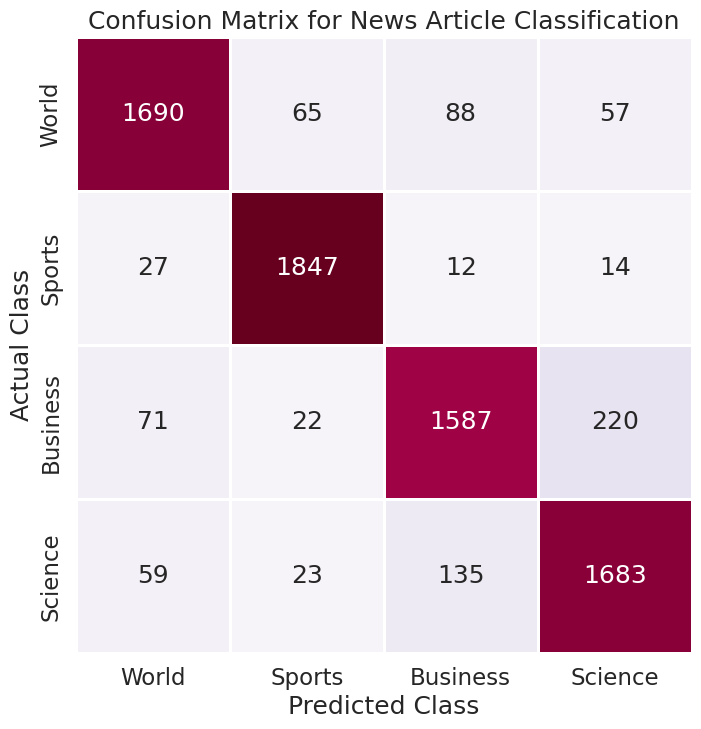

In [34]:
from sklearn.metrics import  confusion_matrix
sns.set(font_scale=1.5)
cof=confusion_matrix(test_y, pred)
cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
plt.figure(figsize=(8,8))

sns.heatmap(cof, cmap="PuRd",linewidths=1, annot=True,square=True,cbar=False,fmt='d',xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science'])
plt.xlabel("Predicted Class");
plt.ylabel("Actual Class");

plt.title("Confusion Matrix for News Article Classification");
